**1.Построить график изменения количества имен Ruth и Robert с 1900 по 2000**

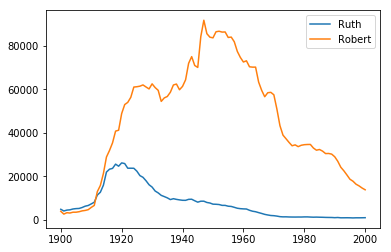

In [15]:
import pandas as pd
import numpy
import os
#import matplotlib.pyplot as plt
#%matplotlib inline
#DATA_PATH = ''
DATA_PATH = 'C:\\Users\\artam\\Documents\\Python1\\Pandas\\names'


def get_data_by_name_from_year(year,source_name):
    
    
    df = pd.read_csv(os.path.join(DATA_PATH,'yob' + str(year) + '.txt'),names=['name','gender',source_name])
    filtered_data = df.query('name  in @source_name')
    agregate_data = filtered_data.groupby('name').aggregate(sum) 
    agregate_data.index = [year]
    return agregate_data


def get_data_by_name_from_range(year_from,year_to,source_name):
    res = get_data_by_name_from_year(year_from,source_name)
    for i in range(year_from+1,year_to+1):
        res = pd.concat([res,get_data_by_name_from_year(i,source_name)])
    return res




d1 = get_data_by_name_from_range(1900,2000,'Ruth')
d2 = get_data_by_name_from_range(1900,2000,'Robert')
d3 = d1.join(d2)
d3.plot()

    

**2.Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).**

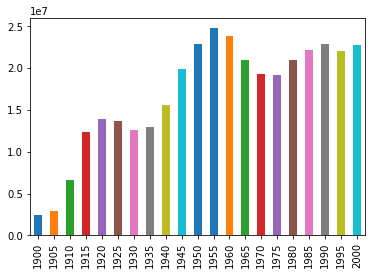

In [11]:
def get_data_from_year(year_from,year_to):
    res = 0
    
    for i in range(year_from,year_to+1):
        
        df = pd.read_csv(os.path.join(DATA_PATH,'yob' + str(i) + '.txt'),names=['name','gender','count'])
        res = res + df['count'].sum()
    result = pd.Series(res,[year_from])
    return result

i = 1900
d = pd.Series()
while i<=2000:
    d = d.append(get_data_from_year(i,i+5))
    i+=5


d.plot(kind='bar')



**3.Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.**

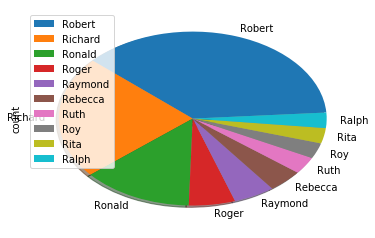

In [12]:
def get_data_from_year(year,begining):
    df = pd.read_csv(os.path.join(DATA_PATH,'yob' + str(year) + '.txt'),names=['Name','gender','count'])
    filtered_data = df[df.Name.str.startswith(begining)]
    sorted_data = filtered_data.sort_values(by='count',ascending = False)
    top10_result = sorted_data[0:10]

    return top10_result


d = get_data_from_year(1950,'R')

d.plot(kind='pie',y = 'count',labels=d['Name'],startangle=4,shadow=True)

**4.Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".**

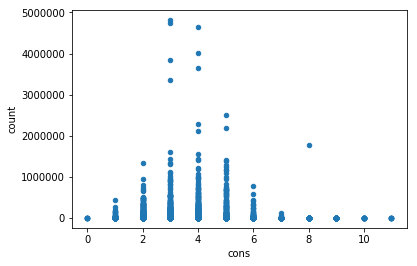

In [14]:
def count_cons(word):
    return sum(1 for x in word.lower() if x not in 'aeiou')
    


def get_data_from_year(year):
    df = pd.read_csv(os.path.join(DATA_PATH,'yob' + str(year) + '.txt'),names=['name','gender','count'])
    return df


def get_counts_from_range(year_from,year_to):
    res = get_data_from_year(year_from)
    for i in range(year_from+1,year_to+1):
        
        res = pd.concat([res,get_data_from_year(i)])
    agregate_data = res.groupby('name').aggregate(sum)
    agregate_data = agregate_data.reset_index()
    
    agregate_data['cons']=agregate_data['name'].map(count_cons)
    return agregate_data


d = get_counts_from_range(1900,2000)
d.plot(kind='scatter',x='cons',y='count')
